In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440


In [3]:
df.isnull().sum()

Country name                           0
Year                                   0
Life Ladder                            0
Log GDP per capita                    28
Social support                        13
Healthy life expectancy at birth      28
Freedom to make life choices          29
Generosity                            82
Perceptions of corruption             96
Positive affect                       19
Negative affect                       13
Confidence in national government    174
dtype: int64

In [4]:
"df = df.fillna(method = 'ffill')"
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,1530.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,0.481973
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,0.192059
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,0.068769
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,0.334735
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,0.464109
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,0.614862
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,0.993604


In [5]:
df['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [6]:
"""1. How happiness in some countries change through years?
2. Predit happiness and actual happiness in some countries? (linear regression)
3. How factors affect to ranking score? (Kmeans clusters)"""

'1. How happiness in some countries change through years?\n2. Predit happiness and actual happiness in some countries? (linear regression)\n3. How factors affect to ranking score? (Kmeans clusters)'

In [7]:
df.sample(10)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
145,Benin,2008,3.667140,7.518167,0.382374,50.900002,0.709477,0.018804,0.825246,0.583623,0.302546,0.602835
504,France,2014,6.466868,10.532729,0.877505,73.000000,0.803474,-0.122516,0.655637,0.811054,0.215894,0.263802
750,Japan,2018,5.793575,10.581618,0.886432,75.000000,0.773472,-0.272972,0.686785,0.703355,0.185300,0.384880
1252,Romania,2014,5.726893,9.887232,0.752941,66.080002,0.754236,-0.102007,0.958325,0.654498,0.330688,0.243379
1117,Nigeria,2008,4.938560,8.457561,0.779640,45.160000,0.584222,0.107002,0.891890,0.739537,0.244094,0.455402
1415,Sri Lanka,2009,4.212027,8.980308,0.829612,66.019997,0.798871,0.301207,0.689926,0.769714,0.172401,0.916602
1181,Paraguay,2007,5.272461,8.790003,0.862656,63.840000,0.698988,0.146859,0.929891,0.866669,0.218699,0.174151
1522,Tunisia,2009,5.025470,9.229710,NaN,64.959999,0.781496,-0.131365,0.722211,NaN,NaN,NaN
1239,Portugal,2018,5.919823,10.262012,0.887113,72.400002,0.877404,-0.262738,0.879728,0.679104,0.317995,0.520631
462,El Salvador,2015,6.018496,8.856461,0.790755,65.199997,0.733356,-0.154916,0.804544,0.825734,0.332647,0.306592


In [8]:
df.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [9]:
df_2018 = df[df.Year == 2018]
df_2018.head(20)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
10,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666
21,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338
28,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN
45,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352
58,Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828
70,Australia,2018,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837
81,Austria,2018,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679
94,Azerbaijan,2018,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372
116,Bangladesh,2018,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693
129,Belarus,2018,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279


In [10]:
usa = df[df['Country name'] == 'United States']
france = df[df['Country name'] == 'France']
south_africa = df[df['Country name'] == 'South Africa']
brazil = df[df['Country name'] == 'Brazil']

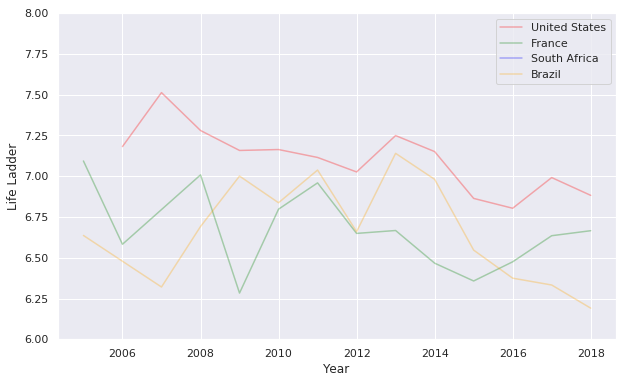

In [11]:
"""Year and Life Ladder"""
ax, fig = plt.subplots(figsize = (10, 6))

life_ladder = [usa, france, south_africa, brazil]
life_ladder2 = ['United States', 'France', 'South Africa', 'Brazil']
color = ['red', 'green', 'blue', 'orange']
for i, j in zip(life_ladder, color):
    #plt.plot(i['Year'], i['Life Ladder'], 'ro')
    sns.lineplot(x = 'Year',
                 y = 'Life Ladder',
                 color = j,
                 alpha = 0.3,
                 data = i)
    plt.ylim(6, 8)
    plt.legend(life_ladder2)

In [13]:
"""countries = ['United States', 'India', 'France', 'South Africa', 'Brazil']
some_countries1 = df['Year'].isin([2018])
some_countries2 = df['Country name'].isin(countries)
some_countries[some_countries1 & some_countries2]"""

"countries = ['United States', 'India', 'France', 'South Africa', 'Brazil']\nsome_countries1 = df['Year'].isin([2018])\nsome_countries2 = df['Country name'].isin(countries)\nsome_countries[some_countries1 & some_countries2]"